# 2.1. Введение
https://vod-progressive.akamaized.net/exp=1645784371~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F3682%2F12%2F318411356%2F1234063518.mp4~hmac=f9361fcd648d3f37da0506e6a859208bfb95b002e01c06460cd87a5a610c2727/vimeo-prod-skyfire-std-us/01/3682/12/318411356/1234063518.mp4

В этом модуле мы разберёмся с фреймворком для нейросетей TensorFlow, посмотрим на детали того, что происходит «под капотом», и какие API есть для нас.

Линейная классификация
Представьте, что у нас есть признаки x = (x1, x2) и есть выборка положительных и отрицательных точек y ∈ {+1, −1}
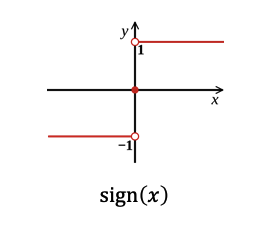
Нам нужно найти разделяющую гиперплоскость между ними. В данном случае это просто линия. Линия задаётся тремя коэффициентами:

Нам нужно найти три коэффициента w, которые зададут линию. Далее мы можем взять точку х и понять, где она находится относительно линии: выше или ниже. Для этого нам нужно узнать знак линейной комбинации. Вектор весов w задаёт нормаль к нашей линии, то есть он перпендикулярен ей (фиолетовый вектор на графике ниже).

Линейная комбинация — это скалярное произведение и длина проекции какого-нибудь другого вектора на наш вектор w.
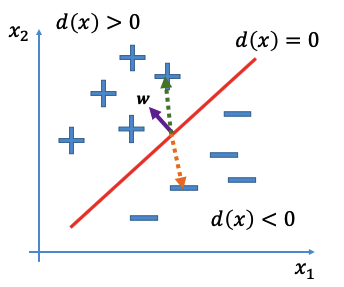
Поэтому проекция становится разных знаков. Из этих соображений мы делаем линейный классификатор. Наш алгоритм: 
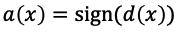
Здесь появляется знак нашей линейной комбинации. Настроить линейный классификатор — значит найти эти коэффициенты. 

Логистическая регрессия
Она тоже решает задачу классификации, но в конце применяется не функция знака, а сигмоидная функция. Она превращает длину проекции в уверенность.

Уверенность и неуверенность появляется из-за краевых эффектов: на границе классов может быть какой-то шум, и в классификации точек, которые находятся рядом с красной разделяющей линией, мы не очень уверены. 
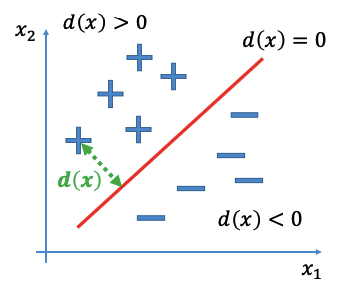
А если мы уходим далеко от линии вглубь классов, то предполагается, что мы более уверены в этом предсказании. Сигмоида делает именно это — превращает длину проекции линейной комбинации в уверенность.

Сигмоида устроена неслучайным образом:
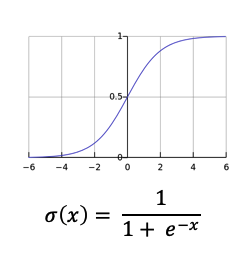
Если длина проекции 0 (точка ровно на красной линии) , то сигмоида даёт 0,5. Логистическая регрессия предсказывает вероятность положительного класса. Вероятность отрицательного будет единица минус предсказанная вероятность положительного класса. 

Другой пример
Представим, что у нас есть следующая задача:
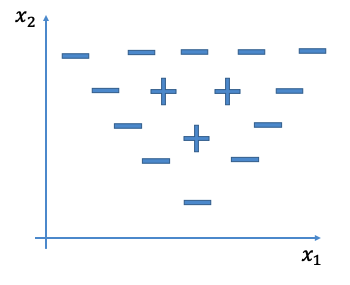
Чтобы решить подобную задачу, мы можем «подпереть» треугольник тремя линиями и сделать алгоритм, используя только логистическую регрессию.

Для начала мы отделим минусы слева и построим логистическую регрессию:
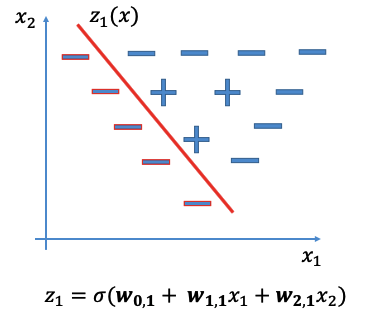
Эти данные подадим для обучения логистической регрессии и получим коэффициенты красной линии. 

Отделим остальные минусы:
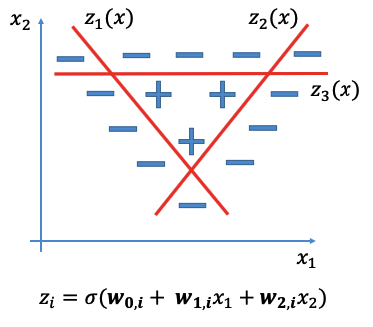
Все коэффициенты мы получили практически вручную. Сейчас у нас есть коэффициенты трёх логистических регрессий, каждая из которых решает свою маленькую подзадачу. 

Теперь возьмём какую-нибудь точку и посмотрим, какие три предсказания дают эти линии в точке:
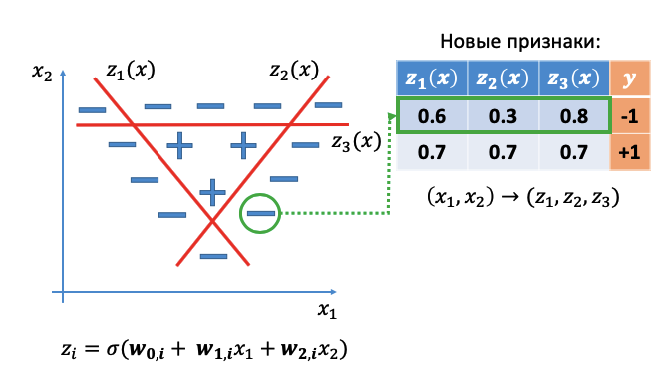
Что делать с этими тремя значениями?
В координатах х1 и х2 эта задача не решается. Поэтому полученные коэффициенты мы можем рассматривать как новые координаты. 

Получим три признака, каждый из которых говорит, где мы находимся относительно каждой стороны треугольника. 

Давайте возьмём наш целевой признак y, добавим его в нашу новую таблицу, где наши новые признаки с предсказаниями, и попробуем решить её с новыми признаками с помощью линейной логистической регрессии. На новой выборке получим логистическую регрессию:
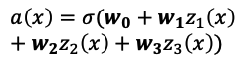
Теперь она даёт нам некоторые коэффициенты и взвешивает уже не признаки, а предсказания. То, что мы получили — простейшая нейросеть. 

# 2.2. Граф вычислений
https://vod-progressive.akamaized.net/exp=1645785147~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F3682%2F12%2F318411961%2F1234064679.mp4~hmac=b67386c5f87cd8173289491cda51bb624e003f11a9ec9556ff22ada813ff6ef4/vimeo-prod-skyfire-std-us/01/3682/12/318411961/1234064679.mp4

ГРАФ ВЫЧИСЛЕНИЙ 

На данный момент мы «руками» нашли параметры всех линий:
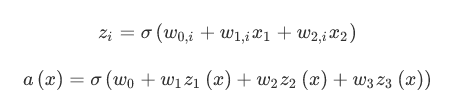
При этом на нашу сложную комбинацию функций можно посмотреть как на граф вычислений. У графа есть вершины, и каждая вершина — вычисляемое значение.

Также есть рёбра — зависимости, которые имеют направления (на картинке ниже это стрелочки). Ребро идёт от х1 к z1 в случае, если нам необходим х1, чтобы вычислить значение z1. Это граф зависимости между вычисляемыми значениями:
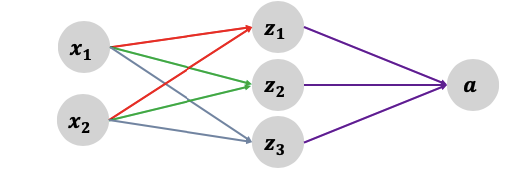
Граф соответствует комбинации наших функций. Такой граф называют многослойным персептроном, и здесь уже можно видеть некоторые слои:
- входной слой (признаки);
- скрытый слой (нейроны);
- выходной слой (предсказания).

НЕЛИНЕЙНОСТИ В НЕЙРОНАХ 

Возьмём в качестве примера следующий граф:
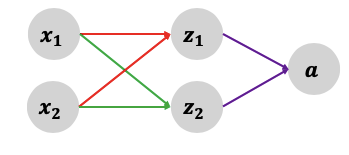
Если нелинейности убрать, то на этом примере видно, что наша модель станет очень простой: мы можем подставить выражения для z1 и z2 в нашу модель а:
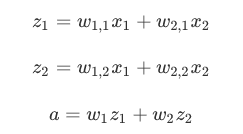
Мы можем раскрыть скобки, привести подобные слагаемые и всё, что мы получим — линейную комбинацию х1 и х2. При этом модель сложнее не становится.
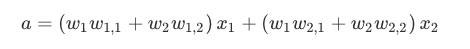

# 2.3. MLP
https://vod-progressive.akamaized.net/exp=1645785291~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F3682%2F12%2F318412207%2F1234066096.mp4~hmac=d859abe1ab8500a3f39bcfc4a95bf80e8fb7440179c16fd88a0d468b28ebdf59/vimeo-prod-skyfire-std-us/01/3682/12/318412207/1234066096.mp4

MLP — это простейший пример нейросети:
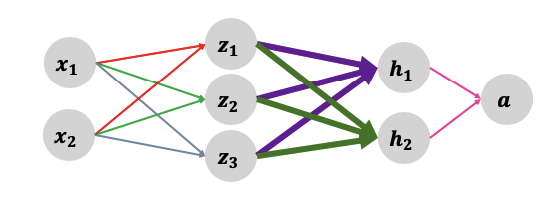
Слои в MLP называют:
- Dense layer (плотный);
- Fully-connected layer (полносвязный).

Архитектура MLP:
- количество слоёв;
- количество нейронов в каждом слое;
- функция активации, которую будем использовать.

# 2.4. TensorFlow
https://vod-progressive.akamaized.net/exp=1645785336~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F3694%2F12%2F318473785%2F1752603284.mp4~hmac=232440f14c04448b8fed92c4eb7ac6945728de942ffa3459c74b783b93e238f8/vimeo-prod-skyfire-std-us/01/3694/12/318473785/1752603284.mp4

TensorFlow (TF) — Deep Learning фреймворк
Основа вычислений в TF — граф. Каждая вершина графа — это одна операция, у которой есть входы и выходы.

Вход любой операции — это набор тензоров (многомерных массивов).
Выход любой операции — это тоже набор тензоров.
А у нас целый граф операций, между которыми перекидываются тензоры.

Дополнительные материалы  
Hello, TensorFlow! https://www.oreilly.com/learning/hello-tensorflow

# 2.5. Пример обучения
https://vod-progressive.akamaized.net/exp=1645785619~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F3741%2F12%2F318708757%2F1235245265.mp4~hmac=7ee56184a2acb756cf112cddda61645ff9f0aa4775d376b09fa66e8ef3cb7838/vimeo-prod-skyfire-std-us/01/3741/12/318708757/1235245265.mp4

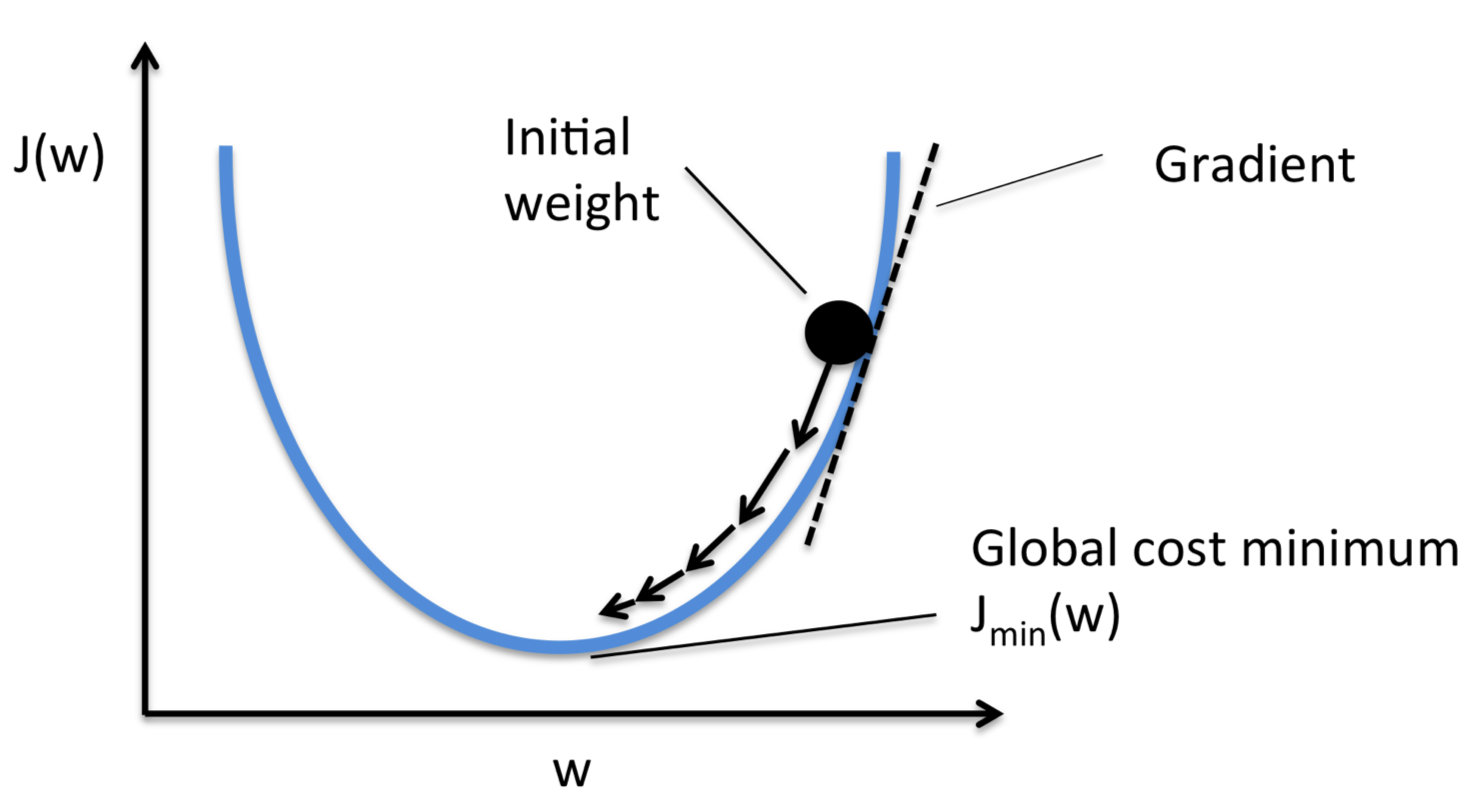
Функция потерь обычно дифференцируемая. Если представить, что у нас есть параметр w, который нужно оптимизировать, то мы можем начать с любой точки (initial weight) и посчитать в ней производную. В данном случае это tg https://ru.wikipedia.org/wiki/Тригонометрия#Свойства_функции_тангенс наклона касательной.

Дополнительные материалы  
В качестве дополнительной литературы рекомендуем ознакомиться с визуализацией обучения нейронной сети с помощью TensorFlow Playground https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.82416&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# 2.6. Детали градиентного спуска: цепное правило
https://vod-progressive.akamaized.net/exp=1645785685~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F3756%2F12%2F318782234%2F1235528232.mp4~hmac=600a68c672280c4096c2260276d34acaa2f1c62069ef1543a99a50881c5c3107/vimeo-prod-skyfire-std-us/01/3756/12/318782234/1235528232.mp4

Умеем дифференцировать:
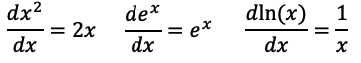
Возьмём сложную функцию:
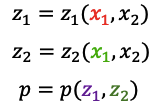
Цепное правило:
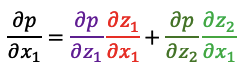
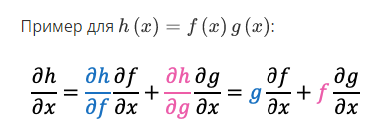

# 2.7. Граф вычисления производных
https://vod-progressive.akamaized.net/exp=1645785749~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F3756%2F12%2F318782384%2F1235530400.mp4~hmac=00a2139e2552bec400461df398289fa3cc5cdb6be166556f5321ebdc03daba75/vimeo-prod-skyfire-std-us/01/3756/12/318782384/1235530400.mp4

Граф для вычисления производных
Граф для вычисления нашей композиции: 
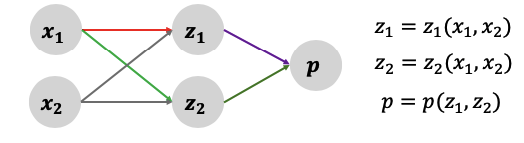
Построим из него граф из производных:
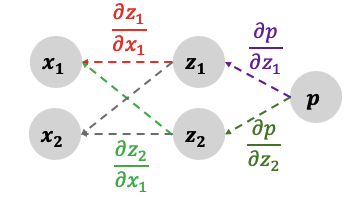
Каждому ребру приписана производная начала по концу. Можно догадаться, как работает цепное правило:
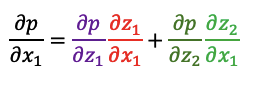

Алгоритм вычисления производной в графе  
Как посчитать производную a по b:
- находим непосещённый путь из a в b;
- перемножаем значения на рёбрах в пути;
- добавляем в сумму;
- возвращаемся к п.1.

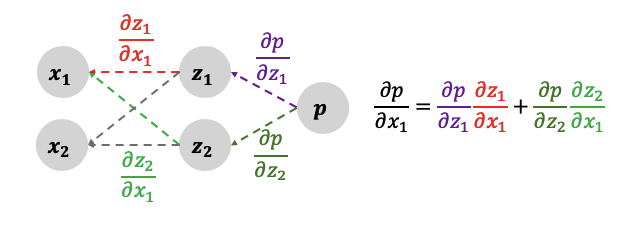

# 2.8. Пример одного нейрона
https://vod-progressive.akamaized.net/exp=1645785838~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F3756%2F12%2F318782819%2F1235532094.mp4~hmac=9701e19ad4fe048402a35d0666fad9196218df211e44eff5f293b8a2c98488ee/vimeo-prod-skyfire-std-us/01/3756/12/318782819/1235532094.mp4

Посмотрим на прямой и обратный граф на примере одного нейрона. 
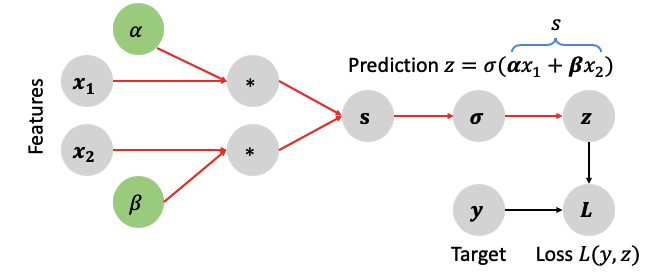
Рассмотрим, из чего он состоит по порядку:
- x1, x2 — признаки, то, что подаётся на вход (плейсхолдеры);
- a, b — веса модели (переменные);
- *  — операции произведения (после идёт подсчёт суммы);
- s — применяем сигмоиду;
- z — записываем в новую переменную;
- L — функция потерь, которая берёт на вход правильные ответы y, предсказанные ответы z  и говорит, насколько они близки друг к другу;
- y — плейсхолдер, правильный ответ.

Производные функции нам нужны, чтобы узнать, как нужно изменить a и b, чтобы минимизировать наши потери: 
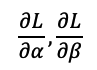
Для того чтобы взять производную, мы переворачиваем наш граф:
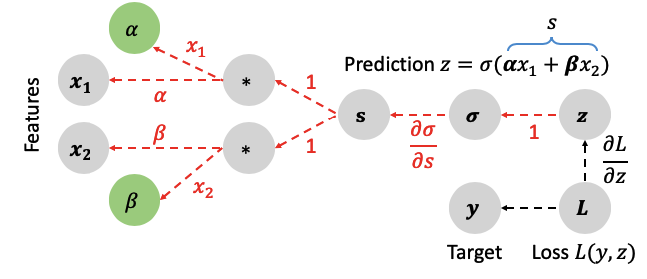
Для каждой стрелочки считаем производную. По сути нам нужно найти обратный путь от L до a:
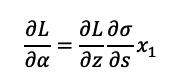
Так же считается и по b:
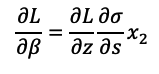
В TF  все производные строятся автоматически и достаточно быстро. 

# 2.9. Цепное правило и граф производных
https://vod-progressive.akamaized.net/exp=1645785927~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F3756%2F12%2F318784482%2F1235541720.mp4~hmac=711eb931843827237d84d83965a7b4ef09ba0899069a72ff8e63194539a90dbf/vimeo-prod-skyfire-std-us/01/3756/12/318784482/1235541720.mp4

Теперь у нас есть алгоритм для подсчёта производных для любых дифференцируемых графов вычислений. Эффективный способ вычисления всех производных называется backpropagation (обратное распространение ошибки):
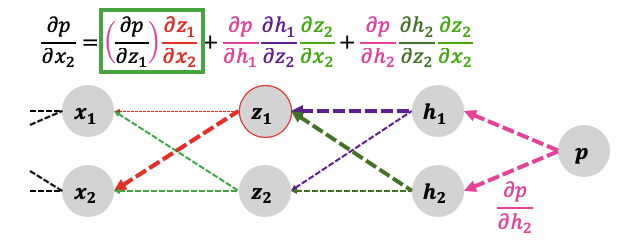
Backpropagation (Backprop)  
В backpropogation есть два прохода: прямой и обратный. Те производные, которые считает обратный граф, нужно считать в определённой точке. Именно для этого нужен прямой проход — он рассчитает аргументы всех этих производных:
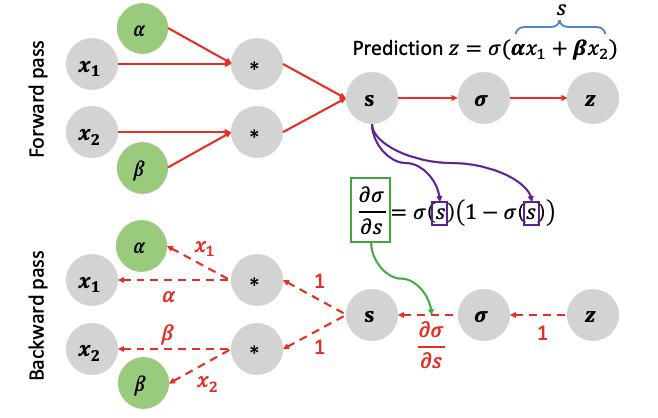
Инициализация весов  
Мы не можем инициализировать нулями. 
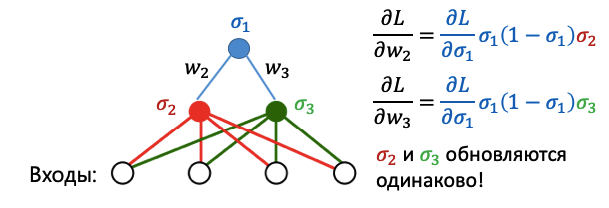
Если на данном примере мы стартуем на нулевых весах, то w2 и w3 будут обновляться симметрично, а значит, мы не научим никакую сложную комбинацию за счёт простоты сети. Это называют симметрией. 

Чтобы сломать симметрию, мы можем использовать случайный шум. 

Дополнительные материалы  
В качестве дополнительной литературы рекомендуем вам прочесть статью «Step-by-step backpropagation example» https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

# 2.10. Практика. TF в Google Colab
https://vod-progressive.akamaized.net/exp=1645786116~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F3742%2F12%2F318710094%2F1752611930.mp4~hmac=2f5097d0e7e28a9ab88144ed1b39aaf5f0883e8b44669e56c01e5ce17c8e7bd3/vimeo-prod-skyfire-std-us/01/3742/12/318710094/1752611930.mp4

Используемый в видео notebook: skillfactory-dl-2-screencast.ipynb. Notebook использует устаревшую версию Tensorflow, и изучать его не нужно. https://lms.skillfactory.ru/assets/courseware/v1/01c396401a3629a34b6560a4dd724ce2/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/skillfactory-dl-2-screencast.ipynb

В этом видео мы познакомимся со средой Google Colab и рассмотрим, что можно делать в TF.

Google Colab — сервис, который позволяет запускать Jupyter-ноутбуки, в которых есть видеокарты и много оперативной памяти.

Перейдём на страницу https://colab.research.google.com/notebooks/welcome.ipynb.

Рекомендуем вам залогиниться через аккаунт Google.

Используемый в видео notebook skillfactory-dl-2-screencast.ipynb https://lms.skillfactory.ru/assets/courseware/v1/01c396401a3629a34b6560a4dd724ce2/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/skillfactory-dl-2-screencast.ipynb сразу можно открыть в Google Colab.

Вы можете сразу изучить все комбинации клавиш во вкладке Tools — Keyboard chortcuts, например: Ctrl + Enter для запуска ячейки.

# 2.11. Практика
https://vod-progressive.akamaized.net/exp=1645786185~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F1756%2F16%2F408783138%2F1752619923.mp4~hmac=f95410e0124f5d3a86c1d035f320668aa39aa880307729f7ae06ddca2e3b0665/vimeo-prod-skyfire-std-us/01/1756/16/408783138/1752619923.mp4

Ноутбук к скринкасту можно открыть в Google Colab. https://colab.research.google.com/drive/1sbT9sts6YCTvJ1TDLzO50tyKLtRB2G98

# 2.12. Домашнее задание
В домашнем задании вам предстоит решить задачу классификации одежды по датасету Fashion MNIST с помощью Keras.

Для выполнения домашнего задания откройте Jupyter notebook https://colab.research.google.com/drive/1TSW5nlZqe25L1skbaDKzB0LkH5Z15mqj с инструкциями по решению задачи и сохраните его на свой Google Диск, с которого вы сможете работать на Google Colaboratory. 

Чтобы завершить домашнюю работу, введите свои ответы на вопросы в поля ниже. 

Удачи!

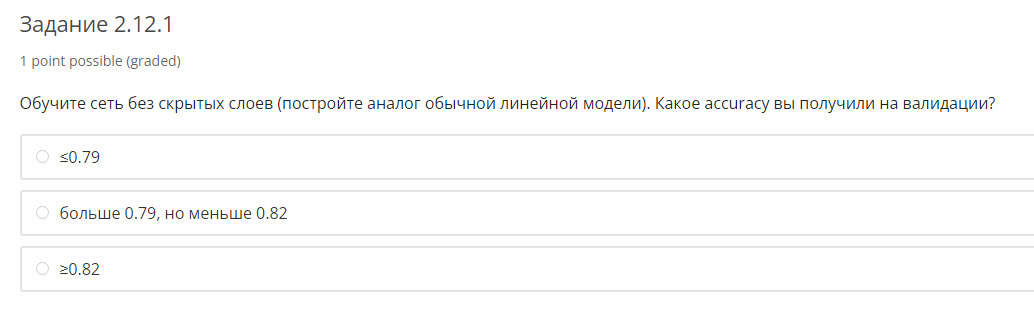

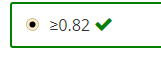

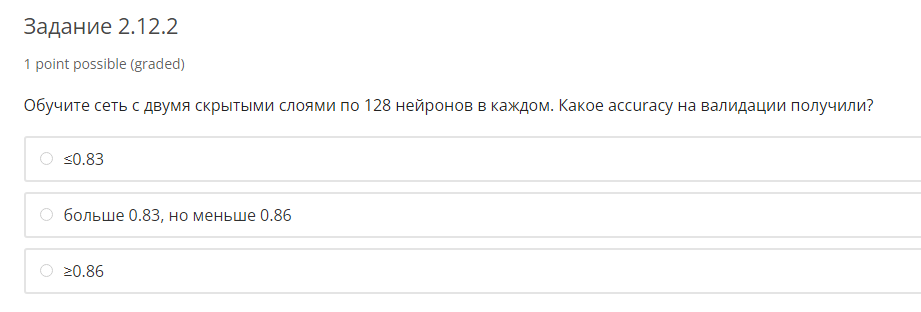

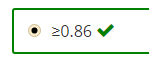

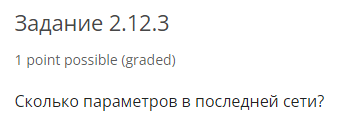

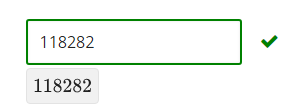